In [1]:
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [7]:
import matplotlib.pyplot as plt

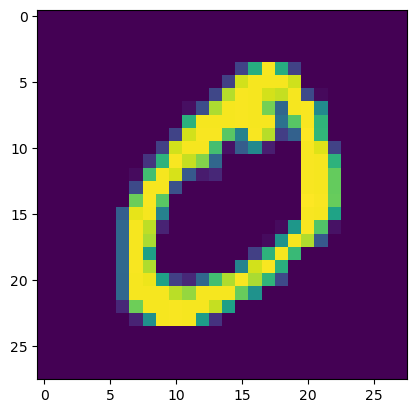

In [9]:
plt.imshow(x_train[1])

In [11]:
x_train=x_train/255
x_test=x_test/255

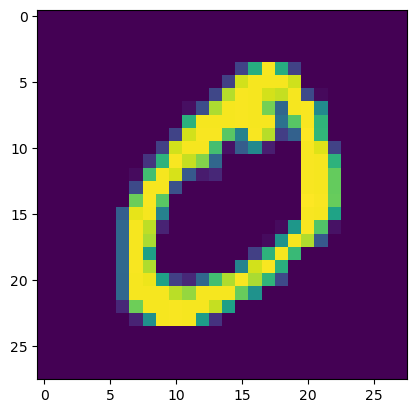

In [12]:
plt.imshow(x_train[1])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=3,            
    monitor='val_Accuracy',       
    mode='max',                    
    restore_best_weights=True      
)

In [17]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [ ]:
graphs=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - Accuracy: 0.7888 - loss: 0.6641 - val_Accuracy: 0.9558 - val_loss: 0.1483
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - Accuracy: 0.9329 - loss: 0.2192 - val_Accuracy: 0.9634 - val_loss: 0.1189
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - Accuracy: 0.9497 - loss: 0.1684 - val_Accuracy: 0.9658 - val_loss: 0.1133
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - Accuracy: 0.9526 - loss: 0.1521 - val_Accuracy: 0.9721 - val_loss: 0.0950
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - Accuracy: 0.9594 - loss: 0.1308 - val_Accuracy: 0.9732 - val_loss: 0.0893
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - Accuracy: 0.9643 - loss: 0.1181 - val_Accuracy: 0.9749 - val_loss: 0.0851
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - Accuracy: 0.9660 - loss: 0.1168 - val_Accuracy: 0.9757 - val_loss: 0.0831
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - Accuracy: 0.9677 -

In [49]:
y_prod=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [50]:
y_pred=y_prod.argmax(axis=1)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_pred,y_test)

0.9784

In [59]:
graphs.history

{'Accuracy': [0.9375625252723694,
  0.9478333592414856,
  0.9544583559036255,
  0.9580625295639038,
  0.961312472820282,
  0.9642500281333923,
  0.9660000205039978,
  0.9666666388511658,
  0.968708336353302,
  0.9694791436195374,
  0.9715625047683716,
  0.9731666445732117,
  0.9725833535194397,
  0.9726666808128357,
  0.9747291803359985,
  0.9763333201408386,
  0.9760208129882812],
 'loss': [0.2086157500743866,
  0.1750202625989914,
  0.1516280472278595,
  0.14058727025985718,
  0.1243278980255127,
  0.11693531274795532,
  0.1078159362077713,
  0.10762982070446014,
  0.099702849984169,
  0.09603042900562286,
  0.09098280966281891,
  0.08799616247415543,
  0.088557668030262,
  0.08583633601665497,
  0.0824037715792656,
  0.07920780032873154,
  0.07640737295150757],
 'val_Accuracy': [0.9646666646003723,
  0.9664166569709778,
  0.9709166884422302,
  0.9725833535194397,
  0.9742500185966492,
  0.9739999771118164,
  0.9749166369438171,
  0.9774166941642761,
  0.9758333563804626,
  0.9766666

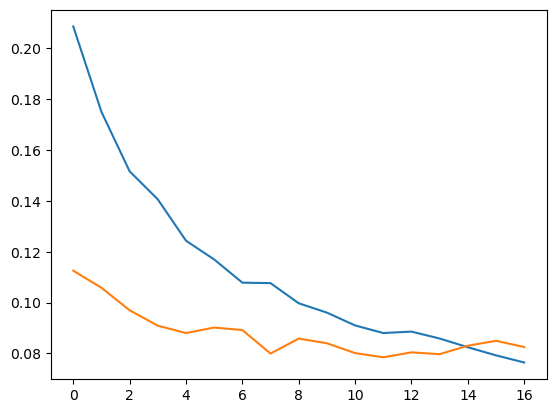

In [61]:
import matplotlib.pyplot as plt
plt.plot(graphs.history['loss'])
plt.plot(graphs.history['val_loss'])

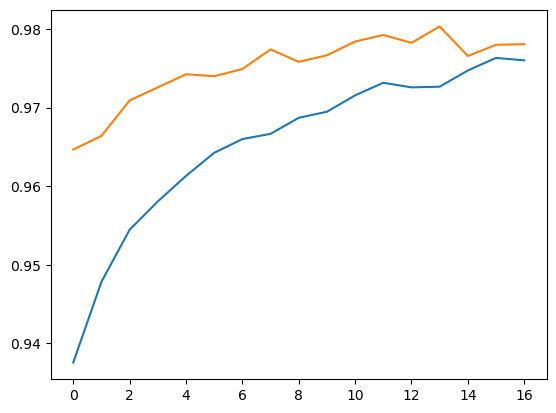

In [63]:
plt.plot(graphs.history['Accuracy'])
plt.plot(graphs.history['val_Accuracy'])